<a href="https://colab.research.google.com/github/yogeshkumar22/diabetes_data_analysis/blob/main/Diabetes_prediction_(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_Pima = pd.read_csv('diabetes.csv')
df_Pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Importing the CSV file and reviewing the columns. Even with just the few rows visible I noticed there was some rows that had 0 where there should be some data.

In [3]:
df_Pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This gives us a review of the data in each column. Again this points to many columns having a minimum value of 0, where it doesn't make sense. Having zero pregnancies makes sense, but having a blood pressure, glucose, insulin, or BMI reading of zero shows we are missing some data. To fix this, we've replaced the 0 in those columns with NaN values to be more accurate.

In [4]:
df_Pima[['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']] = df_Pima[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [5]:
df_Pima.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now that we see how much data is missing, We've created a function to find the mean value of each column grouped by the outcome. This will allow us to provide an estimated value for the NaN based on the outcome. 

In [6]:
def find_mean(column):
    temp = df_Pima[df_Pima[column].notnull()]
    temp = df_Pima[[column, 'Outcome']].groupby('Outcome')[[column]].mean().reset_index()
    return temp

In [7]:
print(find_mean('Glucose'))
print(find_mean('BloodPressure'))
print(find_mean('SkinThickness'))
print(find_mean('Insulin'))
print(find_mean('BMI'))

   Outcome     Glucose
0        0  110.643863
1        1  142.319549
   Outcome  BloodPressure
0        0      70.877339
1        1      75.321429
   Outcome  SkinThickness
0        0      27.235457
1        1      33.000000
   Outcome     Insulin
0        0  130.287879
1        1  206.846154
   Outcome        BMI
0        0  30.859674
1        1  35.406767


Using the information from the find_mean function. We updated the NaN with the mean values.

In [8]:
df_Pima.loc[(df_Pima['Outcome'] == 0) & (df_Pima['Glucose'].isnull()), 'Glucose'] = 110.6
df_Pima.loc[(df_Pima['Outcome'] == 1) & (df_Pima['Glucose'].isnull()), 'Glucose'] = 169.5
df_Pima.loc[(df_Pima['Outcome'] == 0) & (df_Pima['BloodPressure'].isnull()), 'BloodPressure'] = 70.8
df_Pima.loc[(df_Pima['Outcome'] == 1) & (df_Pima['BloodPressure'].isnull()), 'BloodPressure'] = 75.3
df_Pima.loc[(df_Pima['Outcome'] == 0) & (df_Pima['SkinThickness'].isnull()), 'SkinThickness'] = 27.2
df_Pima.loc[(df_Pima['Outcome'] == 1) & (df_Pima['SkinThickness'].isnull()), 'SkinThickness'] = 33.0
df_Pima.loc[(df_Pima['Outcome'] == 0) & (df_Pima['Insulin'].isnull()), 'Insulin'] = 130.3
df_Pima.loc[(df_Pima['Outcome'] == 1) & (df_Pima['Insulin'].isnull()), 'Insulin'] = 206.8
df_Pima.loc[(df_Pima['Outcome'] == 0) & (df_Pima['BMI'].isnull()), 'BMI'] = 30.8
df_Pima.loc[(df_Pima['Outcome'] == 1) & (df_Pima['BMI'].isnull()), 'BMI'] = 35.4

In [9]:
df_Pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

A quick scatterplot to compare BMI and pregnancies with the outcome added as the hue. Looking to see if there is a correlation. This looks pretty evenly distributed positive (1) results for diabetes, but suggesting there might be something to look at when pregnancies get above 7.

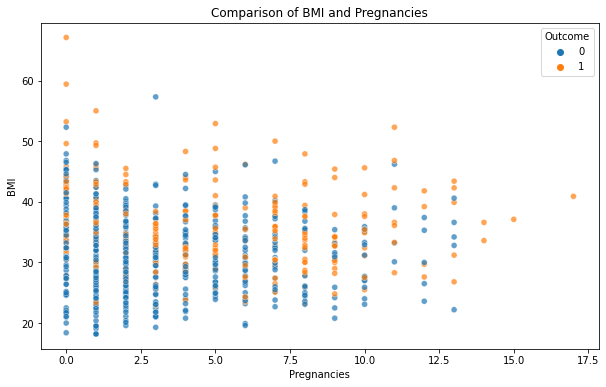

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies', y='BMI', data=df_Pima, hue='Outcome', alpha= 0.7)
plt.title('Comparison of BMI and Pregnancies')
plt.show()

Another scatterplot, this one show BMI and insulin. It shows insulin counts above 200 resulted in more cases of diabetes.

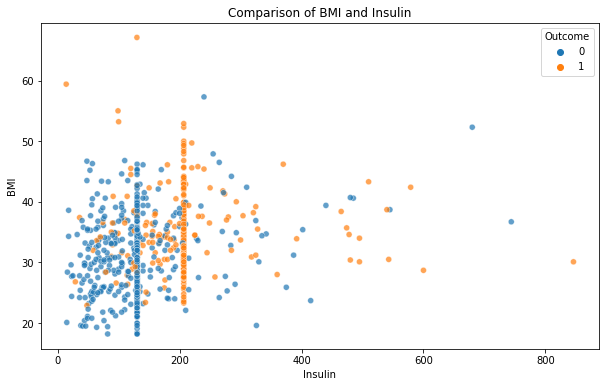

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Insulin', y='BMI', data=df_Pima, hue='Outcome', alpha= 0.7)
plt.title('Comparison of BMI and Insulin')
plt.show()

A barchart showing the overall count of negative cases (500) and positive cases (268).

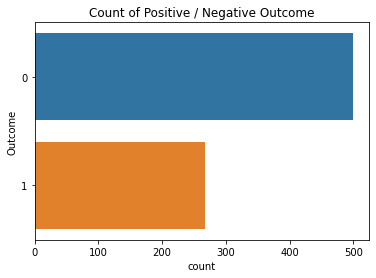

In [12]:
plt.title('Count of Positive / Negative Outcome')
sns.countplot(data=df_Pima, y= 'Outcome')

This histogram shows the counts for age with negative cases in blue and positive (diabetic) cases in orange. 

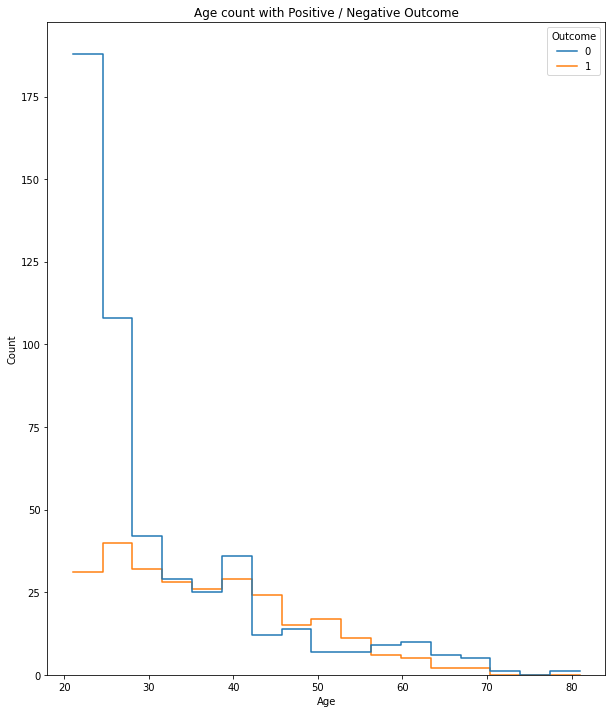

In [13]:
plt.figure(figsize=(10, 12))
plt.title('Age count with Positive / Negative Outcome')
sns.histplot(data= df_Pima, x='Age', hue='Outcome', element= 'step', fill=False)

Below is the correlation between the different features. 

In [14]:
df_Pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130673,0.208954,0.094048,0.093515,0.024154,-0.033523,0.544341,0.221898
Glucose,0.130673,1.000000,0.224166,0.236498,0.497759,0.237257,0.138222,0.269009,0.497835
BloodPressure,0.208954,0.224166,1.000000,0.203377,0.099999,0.286583,-0.002203,0.324483,0.175151
SkinThickness,0.094048,0.236498,0.203377,1.000000,0.212719,0.565681,0.102614,0.135687,0.308571
Insulin,0.093515,0.497759,0.099999,0.212719,1.000000,0.231526,0.121710,0.165125,0.410787
BMI,0.024154,0.237257,0.286583,0.565681,0.231526,1.000000,0.152528,0.027622,0.315335
DiabetesPedigreeFunction,-0.033523,0.138222,-0.002203,0.102614,0.121710,0.152528,1.000000,0.033561,0.173844
Age,0.544341,0.269009,0.324483,0.135687,0.165125,0.027622,0.033561,1.000000,0.238356
Outcome,0.221898,0.497835,0.175151,0.308571,0.410787,0.315335,0.173844,0.238356,1.000000


First step is to preprocess the features to scale. Since there are significant difference in the numbers for each feature, we want to make sure they don't scew the data. Using sklearn scale, I processed the features with the min/max method.

In [15]:
from sklearn.preprocessing import scale

diabetes_labels = df_Pima['Outcome']
diabetes_features = df_Pima[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']]

scaled_features = scale(diabetes_features, axis=0)
print(scaled_features)

[[ 0.63994726  0.85945808  0.64570209  0.56083978  0.16790636  1.4259954 ]
 [-0.84488505 -1.20465424 -0.02697724 -0.30067319 -0.85032783 -0.19067191]
 [ 1.23388019  2.00618715  0.42147564  0.56083978 -1.33035252 -0.10558415]
 ...
 [ 0.3429808  -0.02516149 -0.69965657 -0.50676061 -0.90851264 -0.27575966]
 [-0.84488505  0.13865695  0.42147564  0.56083978 -0.34121073  1.17073215]
 [-0.84488505 -0.94254474  0.1972492  -0.30067319 -0.29757212 -0.87137393]]


Using train_test_split, the data was split into an 80/20 split. Six features were used in this split.

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(scaled_features, diabetes_labels, test_size=0.2, random_state =1)

We used K nearest neighbor as a classifier and tested a few different number of n_neighbor, but ended on 3 with favorable results.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(train_data, train_label)
knn_prediction = classifier.predict(test_data)
classifier.score(test_data, test_label)

0.8831168831168831

With the same six features, We ran a random forest classifier and limited the depth to 6 to help prevent overfitting.

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 100, max_depth=6) 
forest_classifier.fit(train_data, train_label)
forest_prediction = forest_classifier.predict(test_data)
forest_classifier.score(test_data, test_label)

0.8961038961038961

Below are the K-nearest-neighbor metrics. Overall this did good with an F1 score of .83.

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('KNN Accuracey is: ' +str(accuracy_score(test_label, knn_prediction)))
print('KNN Precision score is ' + str(precision_score(test_label,knn_prediction)))
print('KNN F1 score is ' + str(f1_score(test_label,knn_prediction)))

KNN Accuracey is: 0.8831168831168831
KNN Precision score is 0.8627450980392157
KNN F1 score is 0.8301886792452831


Below are the Random forest metrics. This was slightly more accurate, but wasn't significantly more precise. The F1 score was also .84.

In [20]:
print('Random forest Accuracey is: ' +str(accuracy_score(test_label,forest_prediction)))
print('Random forest Precision score is ' + str(precision_score(test_label,forest_prediction)))
print('Random forest F1 score is ' + str(f1_score(test_label,forest_prediction)))

Random forest Accuracey is: 0.8961038961038961
Random forest Precision score is 0.8823529411764706
Random forest F1 score is 0.8490566037735848


We decided to reduce the number of features in an effort to gain more precision. We reduced the features to the top four correlations and reran the K-Nearest_Neighbor and Random Forest classifiers.

In [21]:
diabetes_labels2 = df_Pima['Outcome']
diabetes_features2 = df_Pima[['Glucose', 'SkinThickness', 'Insulin', 'BMI']]

scaled_features2 = scale(diabetes_features, axis=0)

In [22]:
train_data2, test_data2, train_label2, test_label2 = train_test_split(scaled_features2, diabetes_labels2, test_size=0.2, random_state =1)

In [23]:
classifier2 = KNeighborsClassifier(n_neighbors = 3)
classifier2.fit(train_data2, train_label2)
classifier2.score(test_data2, test_label2)

0.8831168831168831

In [24]:
knn_prediction2 = classifier2.predict(test_data2)

Below are the metrics for the K-Nearest_Neighbor. Again we limited it to 3 n_neighbor. Interestingly the results were the same. Suggesting that age and pregancies had no impact of the group becoming diabetic.

In [25]:
print('KNN2 Accuracey is: ' +str(accuracy_score(test_label2,knn_prediction2)))
print('KNN2 Precision score is ' + str(precision_score(test_label2,knn_prediction2)))
print('KNN2 F1 score is ' + str(f1_score(test_label2,knn_prediction2)))

KNN2 Accuracey is: 0.8831168831168831
KNN2 Precision score is 0.8627450980392157
KNN2 F1 score is 0.8301886792452831


In [26]:
forest_classifier2 = RandomForestClassifier(n_estimators = 75, max_depth=6) 
forest_classifier2.fit(train_data2, train_label2)
forest_classifier2.score(test_data2, test_label2)

0.8831168831168831

In [27]:
predictions2 = forest_classifier2.predict(test_data2)

Below are the metrics for the Random Forest with only four features. The scores were slightly down with only four features, but not significant. The F1 score dropped to .82 instead of .84.

In [28]:
print('Random forest2 Accuracey is: ' +str(accuracy_score(test_label2,predictions2 )))
print('Random forest2 Precision score is ' + str(precision_score(test_label2,predictions2 )))
print('Random forest2 F1 score is ' + str(f1_score(test_label2,predictions2 )))

Random forest2 Accuracey is: 0.8831168831168831
Random forest2 Precision score is 0.8627450980392157
Random forest2 F1 score is 0.8301886792452831
